<a href="https://colab.research.google.com/github/ertgrulyksk/Deep-Learning-Projects-With-Keras-TensorFlow-PyTorch/blob/main/Artificial_Neural_Networks_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt
import numpy as np
import warnings
from warnings import filterwarnings

In [9]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [10]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [11]:
print(x_test.shape,y_test.shape)

(10000, 28, 28) (10000,)


In [12]:
num_labels=len(np.unique(y_train))

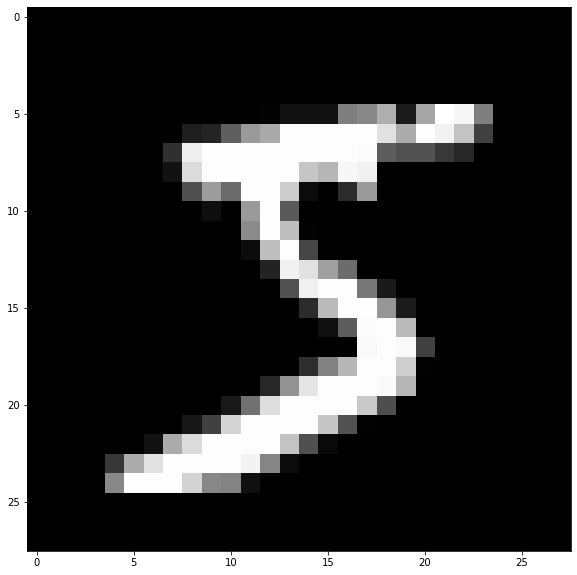

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[0],cmap="gray")

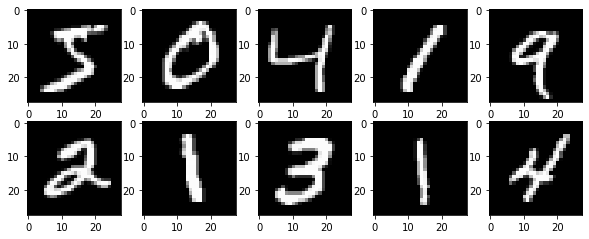

In [14]:
plt.figure(figsize=(10,10))
for i in range(10):
  ax=plt.subplot(5,5,i+1)
  plt.imshow(x_train[i],cmap="gray")

In [15]:
x_train[2].shape

(28, 28)

In [16]:
x_train[2][14,10]

49

In [17]:
x_train[2].sum()

19443

In [18]:
def  visualize_img(data):
  plt.figure(figsize=(10,10))
  for i in range(10):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(x_train[i],cmap="gray")

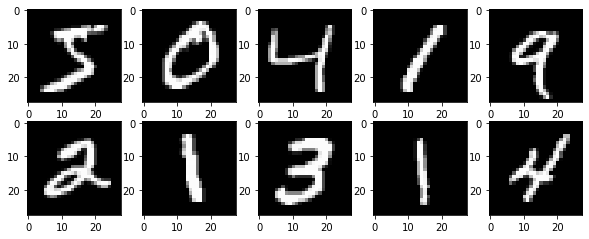

In [19]:
visualize_img(x_train)

In [21]:
x_train[2][14:20,10:20].mean()

96.51666666666667

In [22]:
def pixel_visualize(img):
  fig=plt.figure(figsize=(12,12))
  ax=fig.add_subplot(111)
  ax.imshow(img,cmap="gray")
  width,height=img.shape
  threshold=img.max()/2.5
  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y],2)),xy=(y,x),color="white" if img[x][y]<threshold else "black")

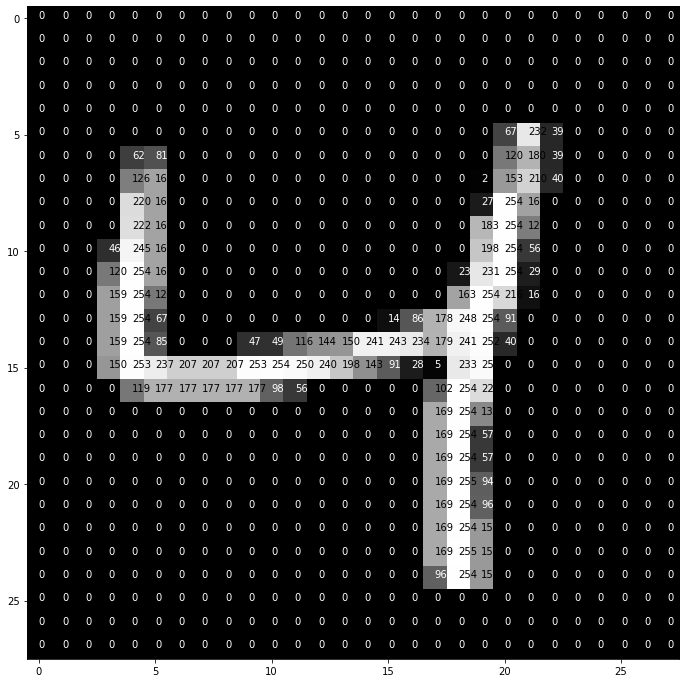

In [23]:
pixel_visualize(x_train[2])

In [24]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [25]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [26]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
x_test.shape

(10000, 28, 28)

In [29]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [30]:
x_train.shape

(60000, 28, 28, 1)

In [31]:
x_test.shape

(10000, 28, 28, 1)

In [32]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [33]:
model=tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128,activation="relu",name="layer1"),
    Dense(units=num_labels,activation="softmax",name="output")
])

In [34]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [36]:
history=model.fit(x_train,y_train,epochs=10
          ,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3664 - precision: 0.9455 - recall: 0.8455 - accuracy: 0.8979 - val_loss: 0.2034 - val_precision: 0.9591 - val_recall: 0.9302 - val_accuracy: 0.9426
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1687 - precision: 0.9642 - recall: 0.9420 - accuracy: 0.9528 - val_loss: 0.1437 - val_precision: 0.9661 - val_recall: 0.9496 - val_accuracy: 0.9579
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1202 - precision: 0.9735 - recall: 0.9583 - accuracy: 0.9657 - val_loss: 0.1167 - val_precision: 0.9727 - val_recall: 0.9604 - val_accuracy: 0.9660
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0926 - precision: 0.9789 - recall: 0.9684 - accuracy: 0.9735 - val_loss: 0.0944 - val_precision: 0.9771 - val_recall: 0.9683 - val_accuracy: 0.9723
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0752 - precision: 0.9828 - r

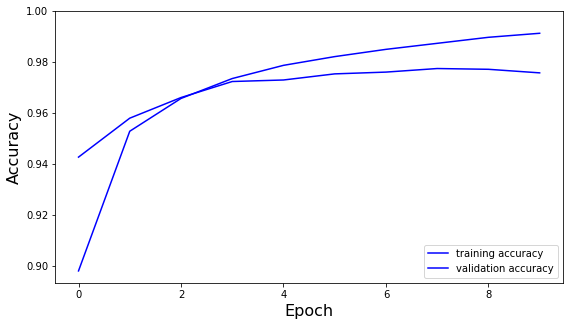

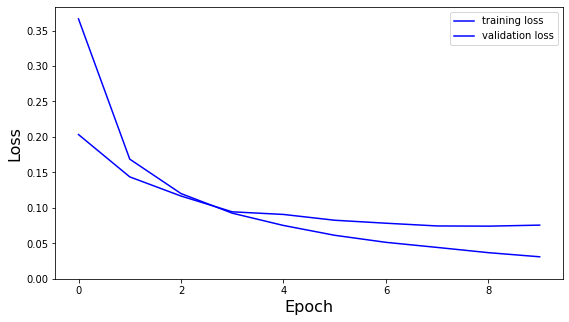

In [37]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],color="b",label="training accuracy")
plt.plot(history.history["val_accuracy"],color="b",label="validation accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim([min(plt.ylim()),1])

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"],color="b",label="training loss")
plt.plot(history.history["val_loss"],color="b",label="validation loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Loss",fontsize=16)
plt.ylim([0,max(plt.ylim())])

plt.show()

In [38]:
loss,precision,recall,acc=model.evaluate(x_test,y_test,verbose=False)
print(100.0*acc)
print(100.0*loss)
print(100.0*precision)
print(100.0*recall)

97.57000207901001
7.5676292181015015
97.89008498191833
97.43000268936157


In [39]:
model.save("mnist_model.h5")

In [40]:
import random

In [41]:
random=random.randint(0,x_test.shape[0])

In [46]:
random

3394

In [47]:
test_image=x_test[random]

In [48]:
y_test[random]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

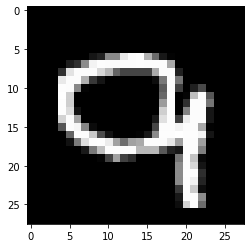

In [49]:
plt.imshow(test_image.reshape(28,28),cmap="gray")

In [51]:
test_data=x_test[random].reshape(1,28,28,1)

In [52]:
probability=model.predict(test_data)

1/1 [==============================] - 0s 71ms/step


In [53]:
probability

array([[7.4333093e-06, 2.3433245e-11, 2.8457501e-07, 5.9527522e-08,
        1.4073258e-04, 2.1736018e-06, 4.8276604e-08, 2.9065210e-04,
        2.5230192e-06, 9.9955612e-01]], dtype=float32)

In [54]:
predicted_classes=np.argmax(probability)

In [55]:
predicted_classes

9